<a href="https://colab.research.google.com/github/bndxn/dissertation/blob/main/Model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive

**Model 20 - Persistence**

[Link](https://colab.research.google.com/drive/1_I8W24DCLGo3HYcqpdvNudsOZwANRQt1#scrollTo=V7gcULgmxE1D)

In [ ]:
persistence = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/model_evaluation/persistence_results.npy')
persistence

array([[  5.        ,  10.52918816],
       [ 30.        ,  18.39684105],
       [ 60.        ,  32.93473053],
       [ 90.        ,  44.16902161],
       [120.        ,  56.7976532 ],
       [180.        ,  87.69841766],
       [240.        , 114.4276886 ]])

In [ ]:
# Models 28B and 29B have different length inputs and outputs
# https://colab.research.google.com/drive/1NdNIovpfmnoLA77qSx6FHgOHBoHw5ulg
# 

**Model 34** - ConvLSTM - masks on padded batches, all 1hr inputs

[Link](https://colab.research.google.com/drive/12dCb9-YzdcZCtas2av_eG-1UnRFaofuQ#scrollTo=**nQotvf3YUcBg**)

In [ ]:
convlstm_masked = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/model_evaluation/convlstm_masked_results.npy')
convlstm_masked

array([[ 60.        ,  25.62217123],
       [120.        ,  43.5965576 ],
       [180.        ,  50.41267371],
       [240.        ,  63.62264849]])

**Model 35** - CNN - all 1hr inputs, no masking needed

[Link](https://colab.research.google.com/drive/1zFpmH8VEIsaRe0eTDzInzl4M1Cfk0XlN#scrollTo=ZWUBK2zFz6Gf)

In [ ]:
cnn = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/model_evaluation/cnn_1hr_input_results.npy')
cnn

array([[ 60.        ,  25.75855946],
       [120.        ,  45.43732312],
       [180.        ,  51.11671614],
       [240.        ,  57.80515714]])

**Model 36** CNN - all 1hr inputs, uses 1D conv on series

In [ ]:
cnn_1d_conv = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/model_evaluation/cnn_1d_conv_1hr_input_results.npy')
cnn_1d_conv

array([[ 60.        ,  24.77700323],
       [120.        ,  39.2983214 ],
       [180.        ,  48.16462705],
       [240.        ,  62.65248572]])

# Comparison of model performance with 1hr of inputs

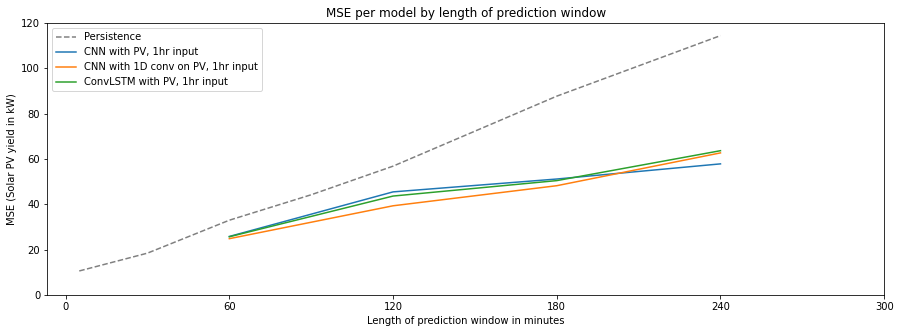

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(persistence[:,0], persistence[:,1], '--', label='Persistence', color='grey')
plt.plot(cnn[:,0], cnn[:,1], label='CNN with PV, 1hr input')
plt.plot(cnn_1d_conv[:,0], cnn_1d_conv[:,1], label='CNN with 1D conv on PV, 1hr input')
plt.plot(convlstm_masked[:,0], convlstm_masked[:,1], label='ConvLSTM with PV, 1hr input')
plt.ylabel('MSE (Solar PV yield in kW)')
plt.title('MSE per model by length of prediction window')
plt.xlabel('Length of prediction window in minutes')
plt.xticks(np.multiply([0,1,2,3,4,5],60))
plt.ylim([0,120])
plt.legend();

# Comparison, 2hrs of input data